<a href="https://colab.research.google.com/github/adinhh20/World-Population-2022-Analysis/blob/main/AnhDinh_TermProject_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Final Term Project</b></u>

### Roster Name: Anh Dinh
### Preferred Name (if different): Anh Dinh
### Student ID: 015583620
### Email address: anh.dinh@sjsu.edu


##  <u> Project description/introduction text (the background information) </u>

On November 15th, 2022, the global population reached 8 billion, which marked 11 years ever since the population hit the 7 billion milestone. This raises the question as to whether if overpopulation is a problem or not. For example, China and India have been the two countries with most population as they both have at least 1 billion individuals, so it is clear that overpopulation has been an issue there. As for the Singapore, its population is not as high as many countries, but in terms of density, it is third in line for the countries with the highest density. Therefore, it might not be an overpopulation issue globally but locally.

Without these knowledges about the population and density, we will not be able to understand which part of the world actually has overpopulation issue or just only has this problem but in a local scale. However, with this project, not only it will show the world’s population overall, it will also allow us to see the growth scale.

##  <u> Machine learning algorithm selected for this project </u>

Because of time shortage, this project contains variations of plotly, seaborn, and country converter to describe the dataset. I choose plotly as it has different way to distribute data and for better data visualization.

##  <u> Dataset source </u>

https://www.kaggle.com/datasets/whenamancodes/world-population-live-dataset

##  <u>References and sources </u>

https://www.un.org/en/desa/world-population-reach-8-billion-15-november-2022#:~:text=The%20global%20population%20is%20projected,today%20on%20World%20Population%20Day.
https://pypi.org/project/country-converter/
https://plotly.com/python/plotly-express/
https://plotly.com/python/choropleth-maps/
https://www.w3schools.com/python/matplotlib_plotting.asp
https://plotly.com/python/builtin-colorscales/
https://machinelearningmastery.com/seaborn-data-visualization-for-machine-learning/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
!pip install country-converter # Use this line when running on Google Colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import country_converter
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

#### Code

In [7]:
# make sure to upload the dataset file if using Google Colab
from google.colab import files
uploaded = files.upload()

Saving World Population Live Dataset.csv to World Population Live Dataset.csv


In [8]:
df = pd.read_csv('World Population Live Dataset.csv')
df_copy = df.copy()

In [9]:
df['CCA3'] = country_converter.convert(names=df['Name'], to="ISO3")
df1 = (df.set_index(["Name","CCA3",'Area (km²)','Density (per km²)','GrowthRate','World Population Percentage','Rank'])
         .stack()
         .reset_index(name='Population')
         .rename(columns={'level_7':'Year'}))
df1.Population = df1.Population*1000

In [10]:
px.choropleth(df1.sort_values('Year'),
              locations = 'CCA3',
              color="Population",
              animation_frame='Year',
              color_continuous_scale ='mint',
              title='World population through years' ,
              height=800)

#### 5 countries with the most population

In [11]:
df.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CHN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IND,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,USA,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,IDN,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PAK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


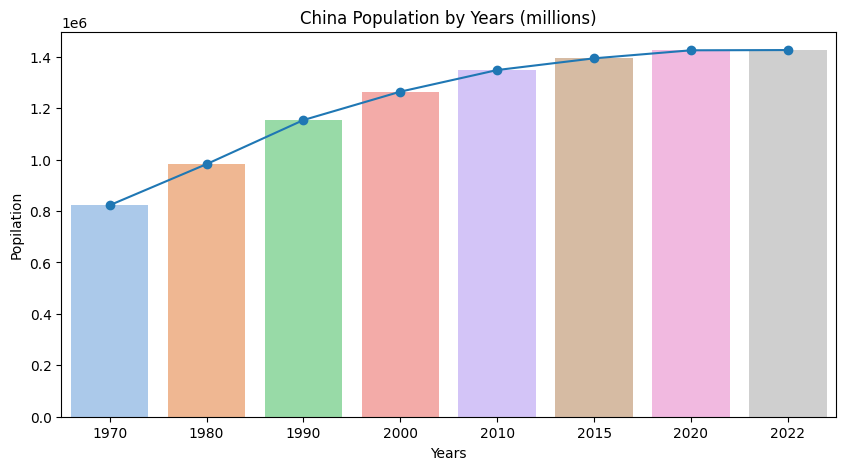

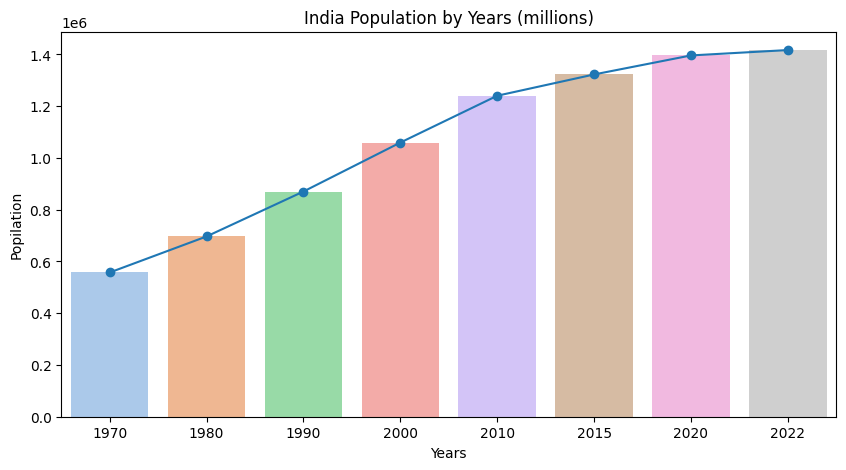

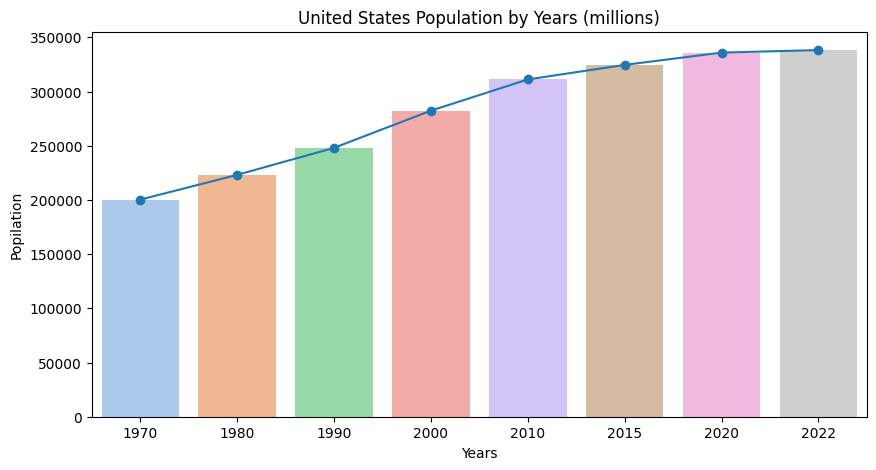

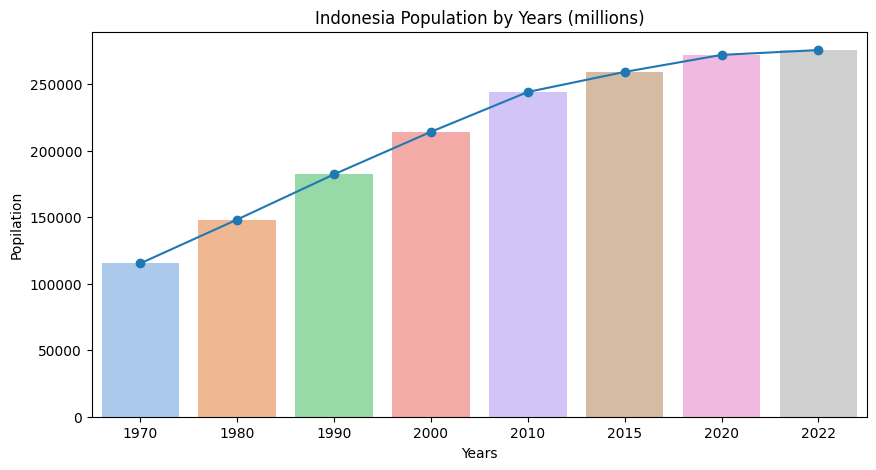

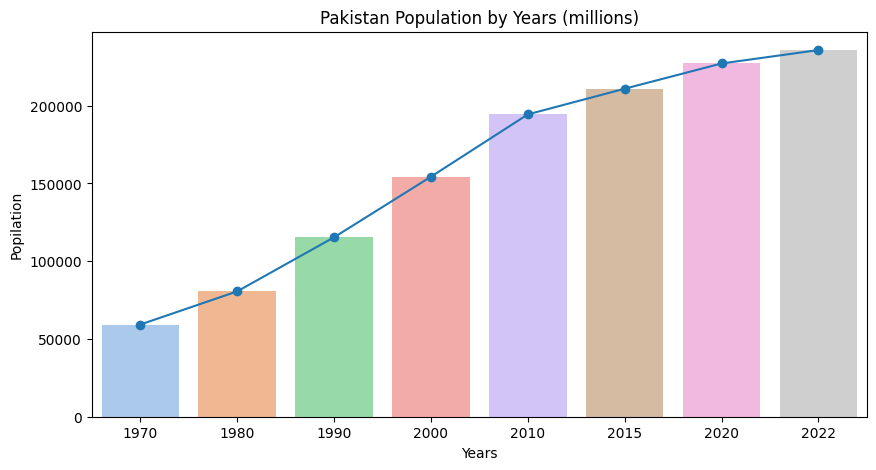

In [14]:
def plotting(df):
    for i in range(len(df.index)):
        country = df.iloc[i][2:10].sort_values()
        name = df.iloc[i][1]
        growth_rate = df.iloc[i][12]
        fig = plt.figure(figsize = (10, 5))
        ax = plt.plot(country,  '-o')
        ax = sns.barplot(x = country.index, y = country,  palette = 'pastel')
        plt.title(str(name)+' Population by Years (millions)')
        plt.xlabel('Years')
        plt.ylabel('Popilation')
        plt.show()
plotting(df.head())

In [15]:
df_copy['World Population Percentage'] = df_copy['World Population Percentage'].str.replace('%', '')
df_copy['World Population Percentage'] = df_copy['World Population Percentage'].astype('float')
df_copy.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96,5


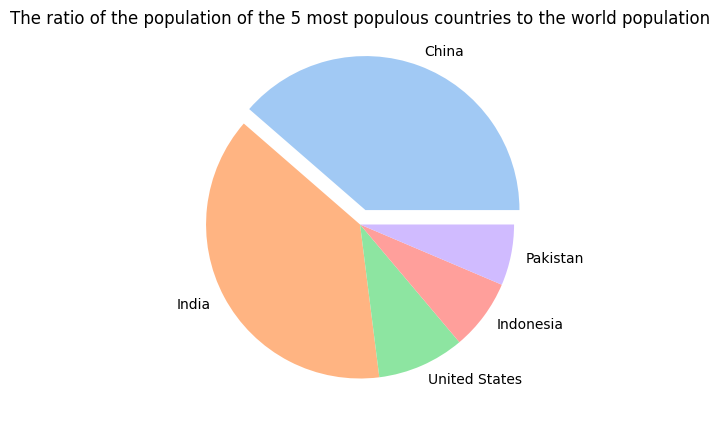

In [16]:
fig = plt.figure(figsize = (7,5))
explode = [0.1, 0, 0, 0, 0]
ax = plt.pie(df_copy['World Population Percentage'][:5], labels = df_copy['Name'][:5], colors=sns.color_palette('pastel'), explode=explode)
plt.title('The ratio of the population of the 5 most populous countries to the world population')
plt.show()

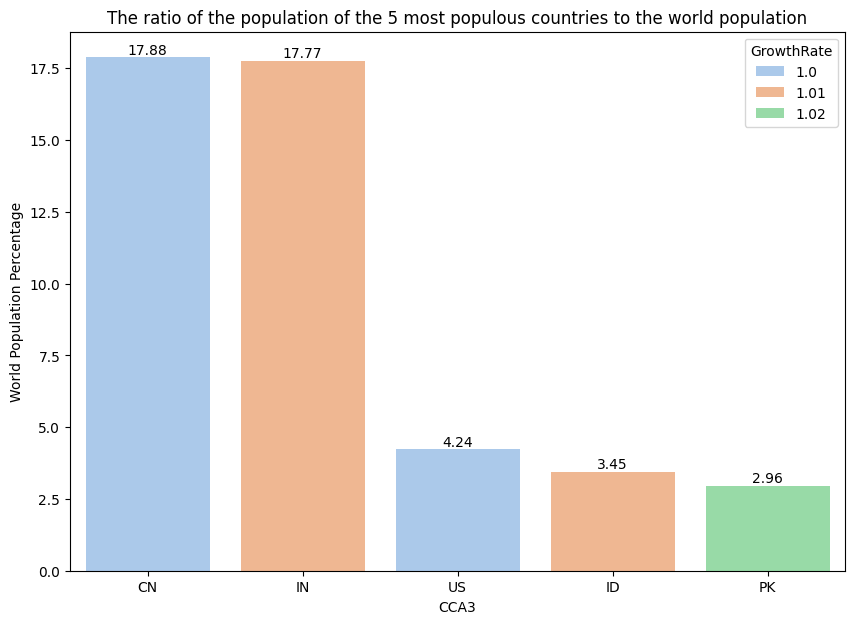

In [17]:
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = df_copy['CCA3'][:5], y = df_copy['World Population Percentage'][:5], palette = 'pastel', hue = df_copy['GrowthRate'][:10])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%g', label_type = 'edge')

plt.title('The ratio of the population of the 5 most populous countries to the world population')
plt.show()

In [18]:
df_copy[:5].sort_values(['Density (per km²)'])

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45,4
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88,1
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96,5
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77,2


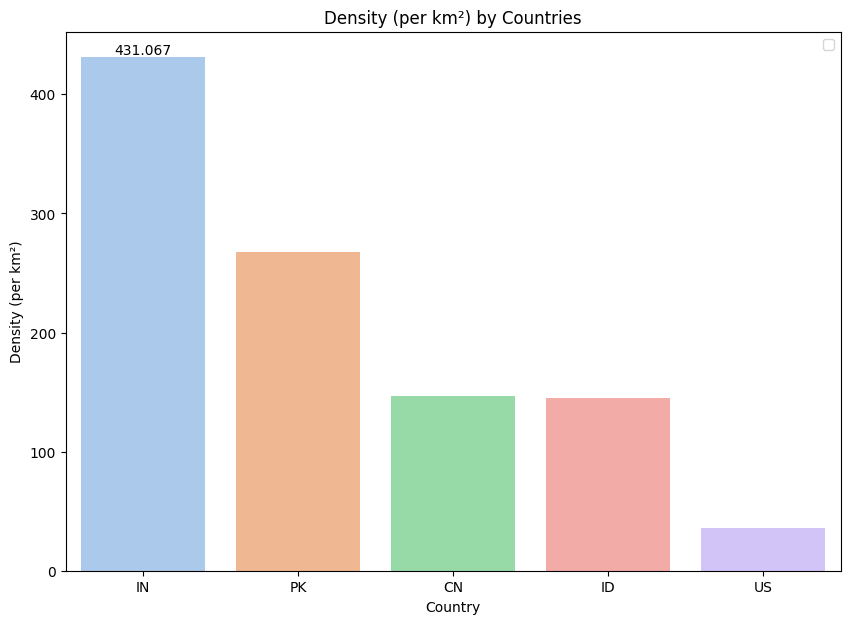

In [19]:
destiny = df_copy[:5].sort_values(['Density (per km²)'], ascending = False)
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = destiny['CCA3'] , y = destiny['Density (per km²)'],
            palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.title('Density (per km²) by Countries')
plt.xlabel('Country')
plt.legend()
plt.show()

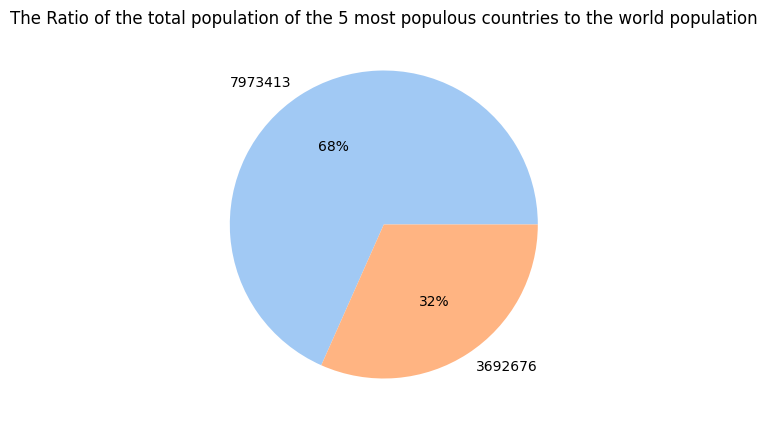

In [20]:
liste = [df_copy['2022'].sum(), df_copy['2022'][:5].sum()]
palette_color = sns.color_palette('pastel')
fig = plt.figure(figsize = (7,5))
explode = [0, 0]
ax = plt.pie(liste, labels = liste, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.xticks(rotation=45)
plt.title('The Ratio of the total population of the 5 most populous countries to the world population')
plt.show()

#### 5 countries with the least population

In [21]:
df_copy.tail()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
229,MS,Montserrat,4,5,5,5,5,11,11,11,102,43.0392,0.99,0.0,230
230,FK,Falkland Islands,4,4,3,3,3,2,2,2,12173,0.3105,1.00,0.0,231
231,NU,Niue,2,2,2,2,2,3,4,5,260,7.4385,1.00,0.0,232
232,TK,Tokelau,2,2,1,1,2,2,2,2,12,155.9167,1.01,0.0,233
233,VA,Vatican City,1,1,1,1,1,1,1,1,1,510.0000,1.00,0.0,234


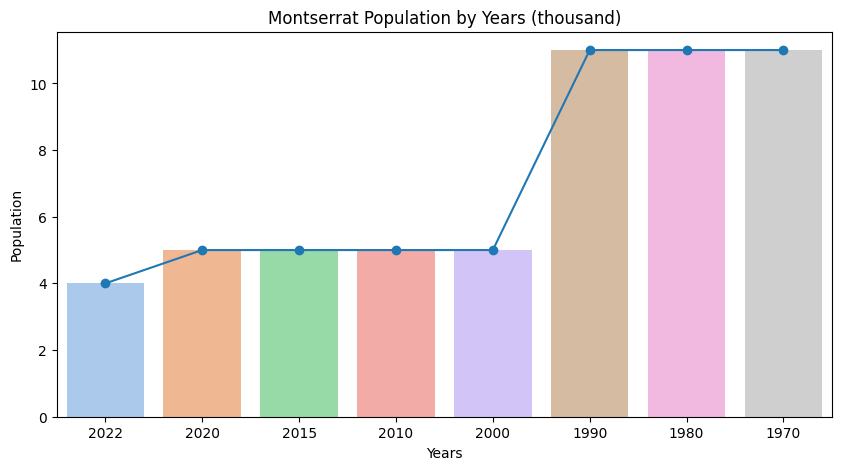

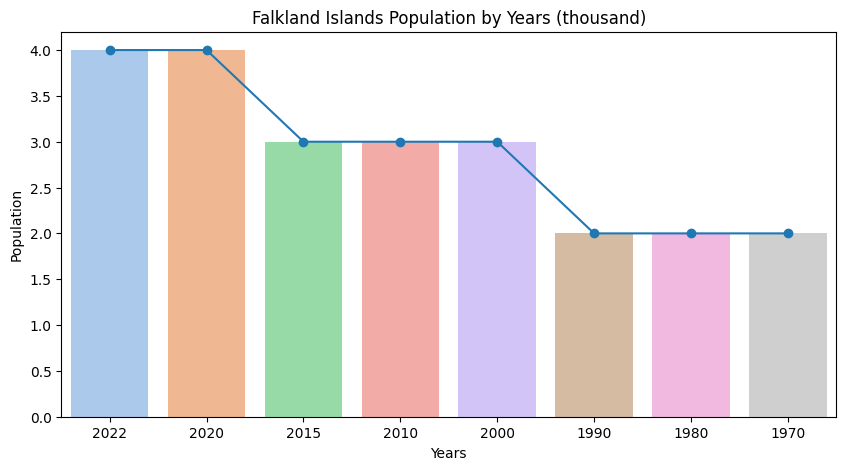

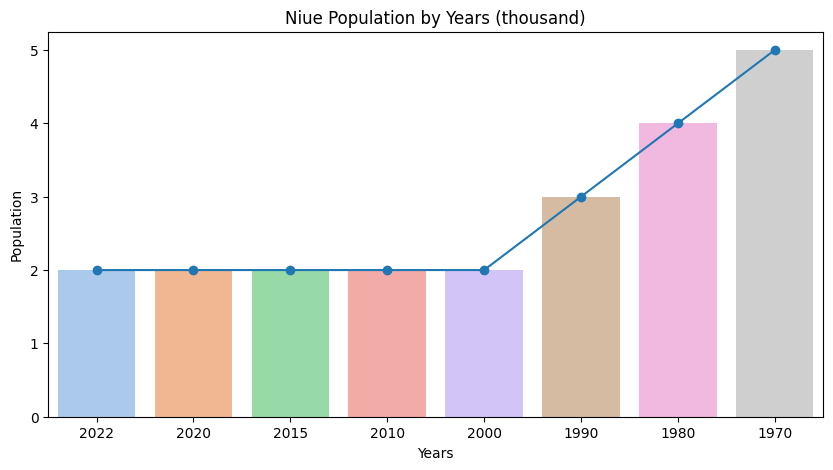

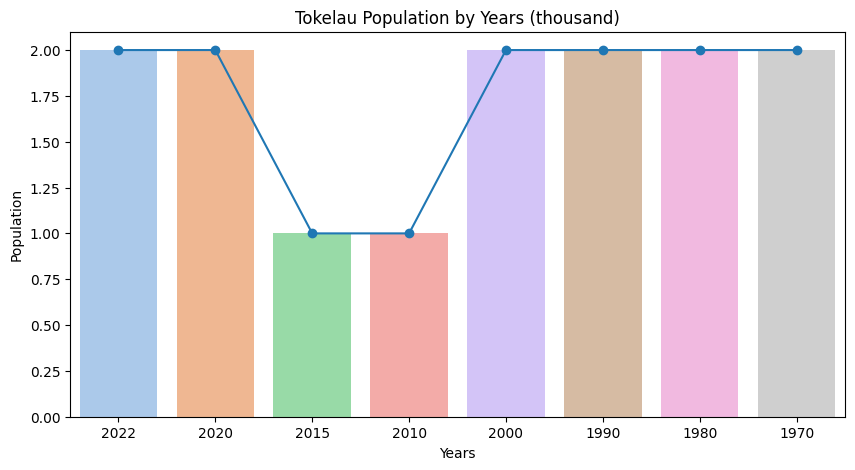

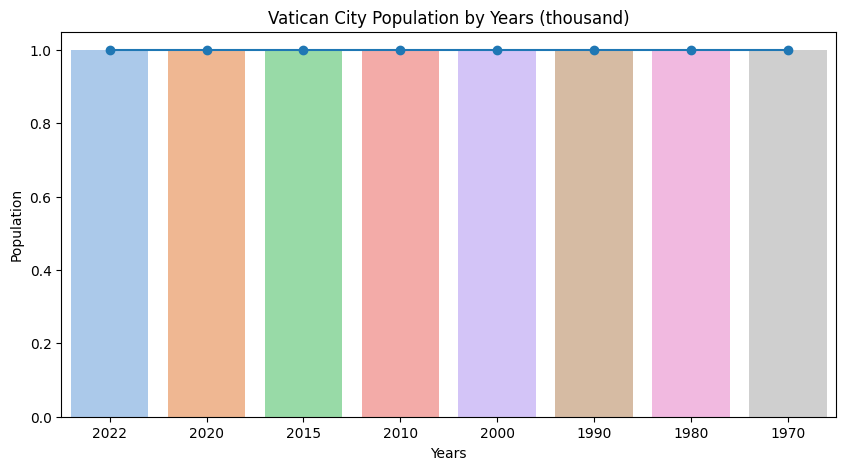

In [23]:
def plottting2(df):
    for i in range(len(df.index)):
        country = df.iloc[i][2:10]
        name = df.iloc[i][1]
        growth_rate = df.iloc[i][12]
        fig = plt.figure(figsize = (10, 5))
        ax = plt.plot(country,  '-o')
        ax = sns.barplot(x = country.index, y = country,  palette = 'pastel')
        plt.title(str(name)+' Population by Years (thousand)')
        plt.xlabel('Years')
        plt.ylabel('Population')
        plt.show()
plottting2(df_copy.tail())

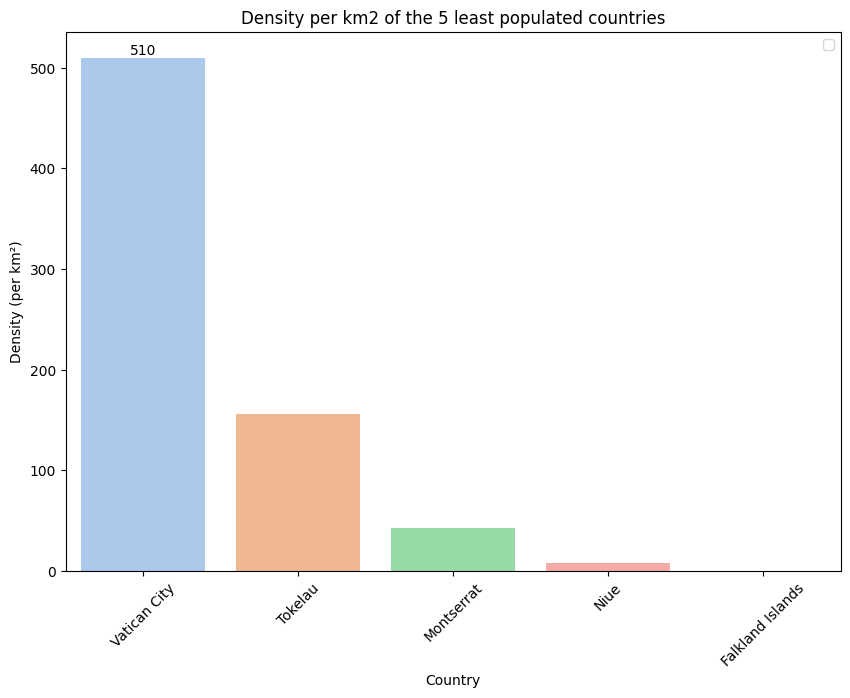

In [24]:
destiny = df_copy.tail().sort_values(['Density (per km²)'], ascending = False)
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = destiny['Name'] , y = destiny['Density (per km²)'],
            palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Density per km2 of the 5 least populated countries')
plt.xlabel('Country')
plt.legend()
plt.show()

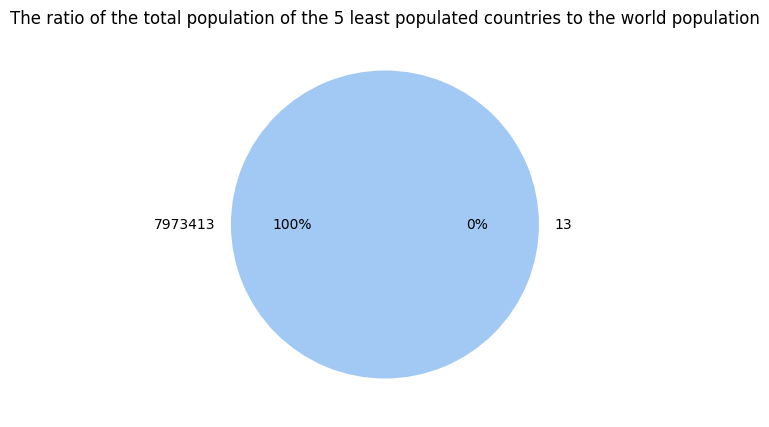

In [25]:
liste = [df_copy['2022'].sum(), df_copy['2022'].tail().sum()]
fig = plt.figure(figsize = (7,5))
explode = [0, 0]
ax = plt.pie(liste, labels = liste, colors=sns.color_palette('pastel'), explode=explode, autopct='%.0f%%')
plt.xticks(rotation=45)
plt.title('The ratio of the total population of the 5 least populated countries to the world population')
plt.show()

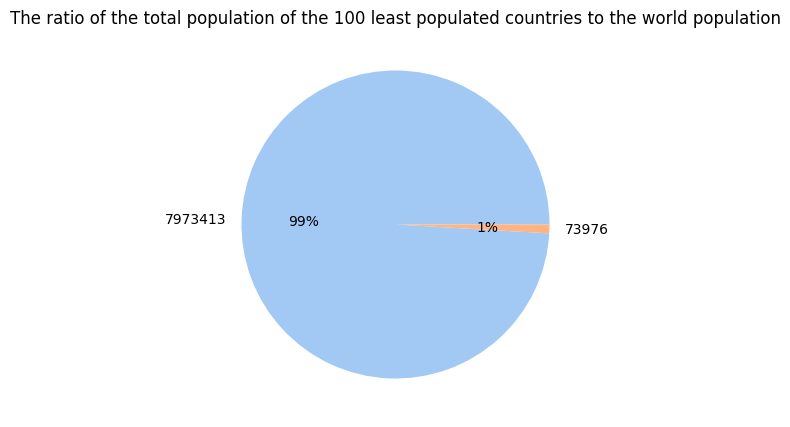

In [26]:
# I added the least 100 because the least 5 took almost 0%
liste = [df_copy['2022'].sum(), df_copy['2022'].tail(100).sum()]
fig = plt.figure(figsize = (7,5))
explode = [0, 0]
ax = plt.pie(liste, labels = liste, colors=sns.color_palette('pastel'), explode=explode, autopct='%.0f%%')
plt.xticks(rotation=45)
plt.title('The ratio of the total population of the 100 least populated countries to the world population')
plt.show()

#### 5 countries with the highest density and 5 countries with the lowest density

In [27]:
df2 = df.sort_values(by = 'Density (per km²)', ascending = False)
df2

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
166,MAC,Macau,695,676,615,557,432,350,245,247,30,23172.2667,1.01,0.01%,167
216,MCO,Monaco,36,37,37,33,32,30,27,24,2,18234.5000,0.99,0.00%,217
112,SGP,Singapore,5976,5910,5650,5164,4054,3022,2401,2062,710,8416.4634,1.01,0.07%,113
103,HKG,Hong Kong,7489,7501,7400,7132,6731,5839,4979,3955,1104,6783.3922,1.00,0.09%,104
218,GIB,Gibraltar,33,33,33,31,28,27,29,27,6,5441.5000,1.00,0.00%,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NAM,Namibia,2567,2489,2283,2099,1819,1369,976,754,825615,3.1092,1.01,0.03%,145
133,MNG,Mongolia,3398,3294,2965,2703,2451,2161,1698,1294,1564110,2.1727,1.02,0.04%,134
171,ESH,Western Sahara,576,556,492,413,270,179,117,76,266000,2.1654,1.02,0.01%,172
230,FLK,Falkland Islands,4,4,3,3,3,2,2,2,12173,0.3105,1.00,0.00%,231


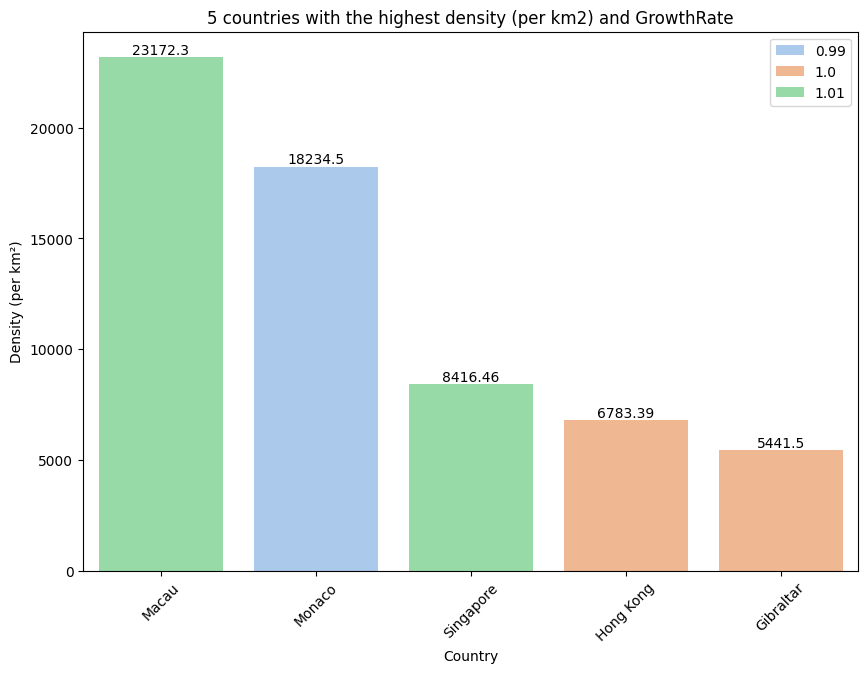

In [28]:
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = df2['Name'][:5] , y = df2['Density (per km²)'][:5],
            palette = 'pastel', hue = df2['GrowthRate'][:5])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=45)
plt.title('5 countries with the highest density (per km2) and GrowthRate')
plt.xlabel('Country')
plt.legend(loc = 1)
plt.show()

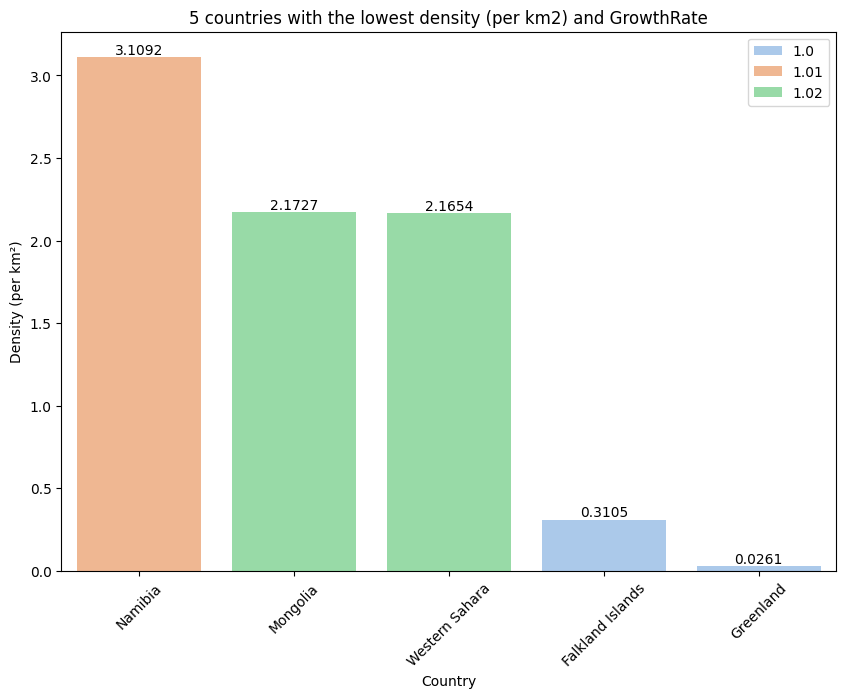

In [29]:
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = df2['Name'][-5:] , y = df2['Density (per km²)'][-5:],
            palette = 'pastel', hue = df2['GrowthRate'][-5:])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=45)
plt.title('5 countries with the lowest density (per km2) and GrowthRate')
plt.xlabel('Country')
plt.legend( loc = 'upper right')
plt.show()

#### Total of the world population

In [30]:
total = df_copy[['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']].sum()
total

,0
1970,3694129
1980,4442407
1990,5314196
2000,6147055
2010,6983783
2015,7424808
2020,7839255
2022,7973413


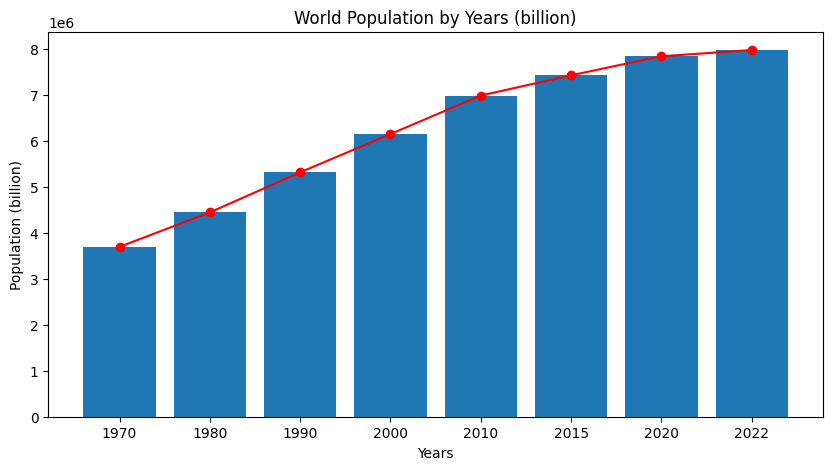

In [31]:
plt.figure(figsize = (10, 5))
plt.plot(total,  '-o', color='red')
plt.bar(x = total.index, height = total)
#plt.fill_between(x = total.index, y1 = total)
plt.title('World Population by Years (billion)')
plt.ylabel('Population (billion)')
plt.xlabel('Years')
plt.show()